In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt




In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
     

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


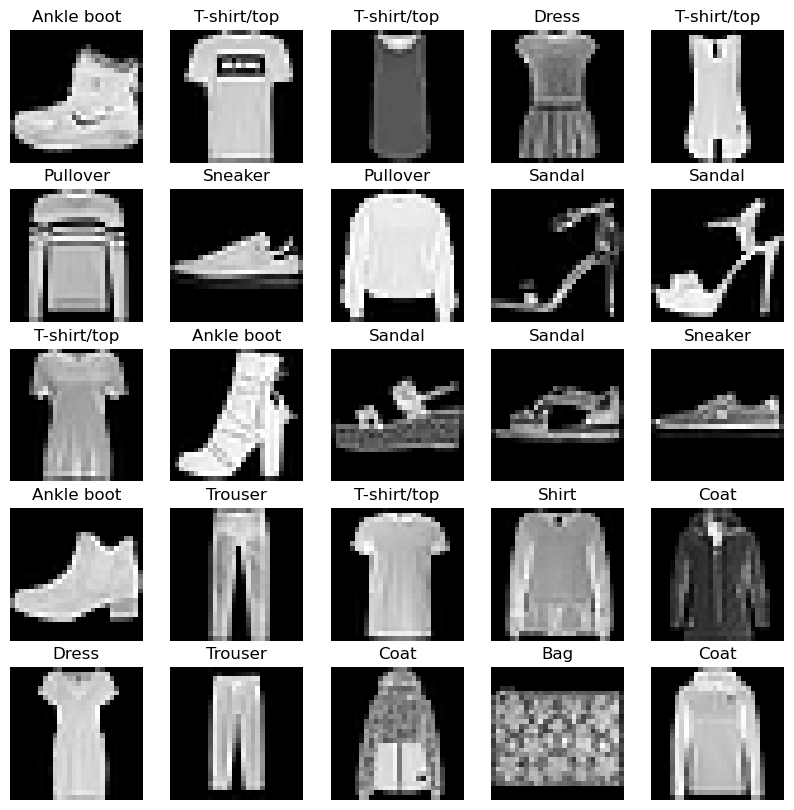

In [4]:
import matplotlib.pyplot as plt

# Define class labels for Fashion MNIST
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display a few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Change this number to display more or fewer images
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='grey')  # Displaying grayscale images
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
     

In [8]:
model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)
     

Epoch 1/5


2024-04-22 21:55:26.034278: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 20s 13ms/step - loss: 1.3548 - accuracy: 0.8335 - val_loss: 0.3581 - val_accuracy: 0.8765
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3107 - accuracy: 0.8897 - val_loss: 0.3332 - val_accuracy: 0.8842
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2694 - accuracy: 0.9034 - val_loss: 0.3027 - val_accuracy: 0.8936
Epoch 4/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2472 - accuracy: 0.9106 - val_loss: 0.3319 - val_accuracy: 0.8866
Epoch 5/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2298 - accuracy: 0.9159 - val_loss: 0.3424 - val_accuracy: 0.8837


In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

     

313/313 [==============================] - 1s 4ms/step - loss: 0.3642 - accuracy: 0.8762
Test Accuracy: 0.8762000203132629


In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

     

Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 0.1570 - accuracy: 0.9428 - val_loss: 0.3012 - val_accuracy: 0.9038
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.1342 - accuracy: 0.9503 - val_loss: 0.3151 - val_accuracy: 0.9011
Epoch 3/10
375/375 [==============================] - 13s 34ms/step - loss: 0.1205 - accuracy: 0.9571 - val_loss: 0.3470 - val_accuracy: 0.9018
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.1141 - accuracy: 0.9581 - val_loss: 0.3494 - val_accuracy: 0.9029
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.1047 - accuracy: 0.9610 - val_loss: 0.3663 - val_accuracy: 0.9019
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.1018 - accuracy: 0.9616 - val_loss: 0.3991 - val_accuracy: 0.8999
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.1027 - accuracy: 0.9619 - val_loss: 0.4058 - val_accuracy:

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5013 - accuracy: 0.8936
Test Accuracy: 0.8935999870300293


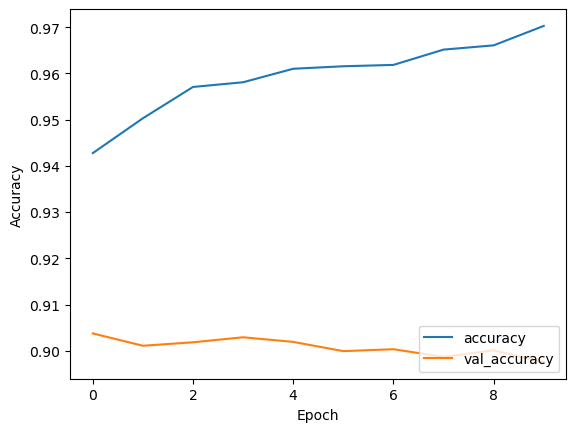

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()